In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

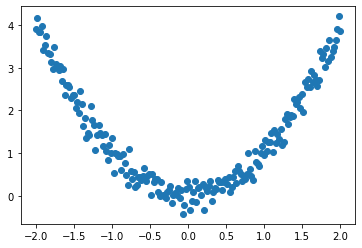

In [3]:
x_data = np.linspace(-2, 2, 200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + noise
#print("x_data:")
#print(x_data)
#print("noise:")
#print(noise)
#print("y_data:")
#print(y_data)
plt.scatter(x_data, y_data)
plt.show()

In [4]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [5]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

inputs = Variable(x_data)
target = Variable(y_data)

In [6]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在_init_()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        # 1-10-1
        self.fc1 = nn.Linear(1,10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10,1)
    
    # 定义网络计算
    def forward(self,x):
        X = self.fc1(x)
        X = self.tanh(x)
        X = self.fc2(x)
        return X

In [7]:
# 定义模型
model = LinearRegression()
# 定义损失函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr = 0.3)

In [8]:
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc1.weight, param:Parameter containing:
tensor([[-0.2836],
        [ 0.9980],
        [-0.3639],
        [-0.2742],
        [ 0.1840],
        [-0.2323],
        [ 0.4950],
        [-0.3660],
        [ 0.2658],
        [ 0.0702]], requires_grad=True)
name:fc1.bias, param:Parameter containing:
tensor([-0.7584,  0.1099, -0.1266, -0.6312, -0.8469,  0.6849,  0.2280, -0.8085,
         0.1370, -0.3171], requires_grad=True)
name:fc2.weight, param:Parameter containing:
tensor([[-0.1996, -0.2481, -0.0904,  0.2203,  0.1886, -0.2014, -0.2194, -0.2221,
          0.2542, -0.0181]], requires_grad=True)
name:fc2.bias, param:Parameter containing:
tensor([0.0118], requires_grad=True)


In [ ]:
for i in range(2001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i, loss.item())

In [1]:
y_pred = model(inputs)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data.numpy(),'r-',lw=3)
plt.show()

NameError: name 'model' is not defined